In [1]:
import uns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
def colormap(N): 
    return colors.ListedColormap(plt.cm.plasma(np.linspace(0,1,N)))
from mpl_toolkits.mplot3d import Axes3D

training = pd.read_msgpack('training.bin')
training.columns

Index(['centcol', 'centrow', 'contH', 'contW', 'contour', 'contxmax',
       'contxmin', 'contymax', 'contymin', 'hasmask', 'img', 'maskarea',
       'moments', 'pixels', 'skelavgdist', 'skeldist10', 'skeldist25',
       'skeldist50', 'skeldist75', 'skeldist90', 'skelmaxdist', 'skelpixels',
       'subject', 'svd', 'svdx0', 'svdx1', 'svdy0', 'svdy1', 'unitcontour'],
      dtype='object')

# Prepare the numeric array

In [2]:
Columns = ['centrow', 'contH', 'contW', 'contymax', 'contymin', 'maskarea',
           'skelavgdist', 'skeldist10', 'skeldist25',
           'skeldist50', 'skeldist75', 'skeldist90', 'skelmaxdist', 'skelpixels',
           'svdx0', 'svdx1', 'svdy0', 'svdy1']

training['hasmask'] = training['centcol'].notnull()
data = training[training['hasmask']][Columns]
data.head(10)

centrow     contH     contW  contymax  contymin  maskarea  skelavgdist  \
0   0.215119  0.141046  0.148295  0.830697  0.689651  0.137656     0.018983   
1   0.253135  0.132774  0.187685  0.527586  0.394812  0.160957     0.022807   
2   0.212435  0.179318  0.193123  0.681039  0.501721  0.181390     0.025552   
3   0.190581  0.105176  0.131088  0.560348  0.455172  0.125667     0.019622   
6   0.209559  0.129318  0.172695  0.837935  0.708617  0.155641     0.023105   
13  0.218306  0.168972  0.162076  0.698279  0.529307  0.171849     0.026300   
14  0.193618  0.112089  0.129317  0.756913  0.644824  0.127306     0.019631   
16  0.220568  0.119093  0.139757  0.453572  0.334479  0.140475     0.021969   
19  0.211625  0.134554  0.172483  0.760342  0.625787  0.157450     0.024062   
22  0.220191  0.168010  0.165999  0.674195  0.506185  0.173158     0.026844   

    skeldist10  skeldist25  skeldist50  skeldist75  skeldist90  skelmaxdist  \
0     0.001724    0.001724    0.001724    0.001724    0.001724     0.048766   
1     0.001724    0.001724    0.001724    0.001724    0.001724     0.055602   
2     0.001724    0.001724    0.001724    0.001724    0.001724     0.065267   
3     0.001724    0.001724    0.001724    0.001724    0.001724     0.053448   
6     0.001724    0.001724    0.001724    0.001724    0.001724     0.060345   
13    0.001724    0.001724    0.001724    0.001724    0.001724     0.068663   
14    0.001724    0.001724    0.001724    0.001724    0.001724     0.053532   
16    0.001724    0.001724    0.001724    0.001724    0.001724     0.058975   
19    0.001724    0.001724    0.001724    0.001724    0.001724     0.065426   
22    0.001724    0.001724    0.001724    0.001724    0.001724     0.075862   

    skelpixels     svdx0     svdx1     svdy0     svdy1  
0     0.023012 -1.378424 -0.338406 -4.788721  0.097409  
1     0.017894 -1.614105 -0.370343 -2.922556  0.204538  
2     0.019114 -1.356776 -0.427169 -3.736017  0.155131  
3     0.014750 -1.232677 -0.268809 -3.221329  0.102863  
6     0.019644  1.324434  0.378422  4.885076 -0.102597  
13    0.015954 -1.387557 -0.369740 -3.877511  0.132311  
14    0.012973 -1.239655 -0.277538 -4.422265  0.077800  
16    0.018235 -1.413447 -0.285221 -2.488974  0.161972  
19    0.017429 -1.338973 -0.366048 -4.392014  0.111595  
22    0.020057 -1.400595 -0.363108 -3.754082  0.135470

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
#X = data.values
X = StandardScaler().fit_transform(data.values)
P = pca.fit(X)
pca.explained_variance_ratio_


array([ 0.35863161,  0.19482475,  0.17456339,  0.09205481,  0.06055988,
        0.04479958,  0.02379888,  0.01964107,  0.01240433,  0.00851099,
        0.00338153])

In [4]:
pft = P.fit_transform(X)

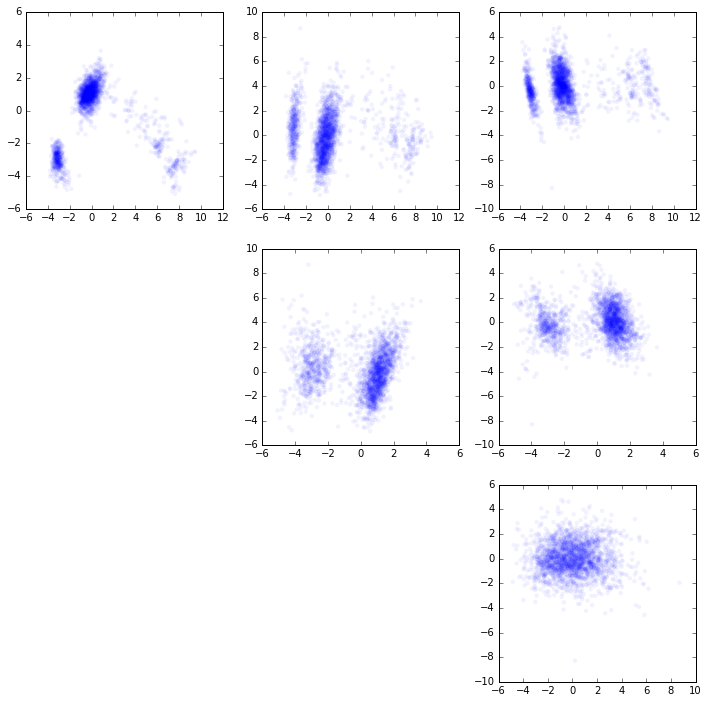

In [5]:
def plot_pca_comps(P, ncomp, *args, **kwargs):
    fig = plt.figure(figsize=kwargs.pop('figsize',(8,6)))
    for i in np.arange(ncomp):        
        for j in np.arange(i+1, ncomp):
            ax = fig.add_subplot(ncomp-1, ncomp-1, j+i*(ncomp-1))
            ax.scatter(P[:,i], P[:,j], *args, **kwargs)

plot_pca_comps(pft, 4, figsize=(12,12), alpha=0.05, edgecolors='none')

## Clustering

In [6]:
from sklearn import cluster
kmc = cluster.KMeans(n_clusters=4).fit_predict(P.transform(X))

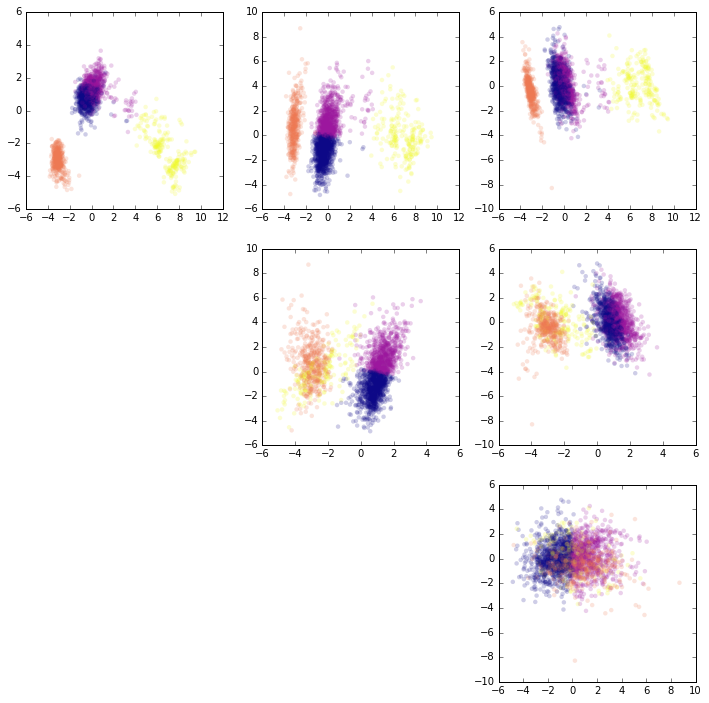

In [7]:
plot_pca_comps(pft, 4, figsize=(12,12), 
               alpha=0.2, 
               edgecolors='none', 
               color=kmc, 
               cmap=colormap(len(set(kmc))))

0.0


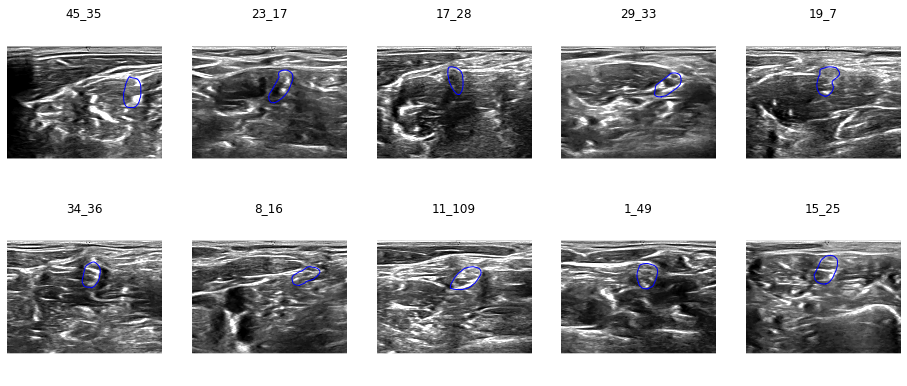

1.0


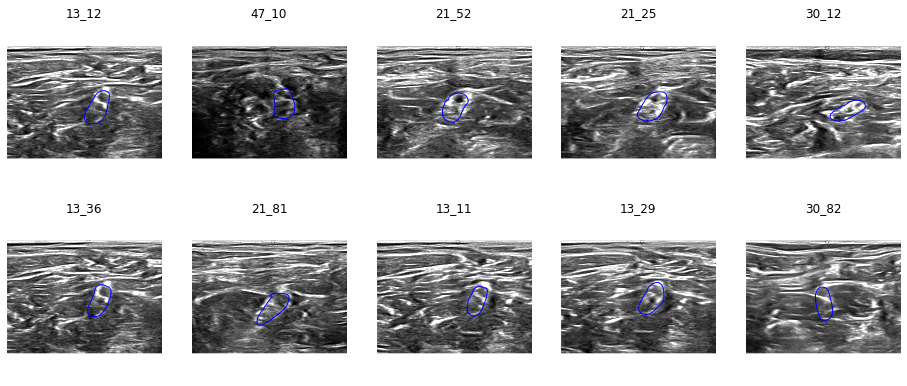

2.0


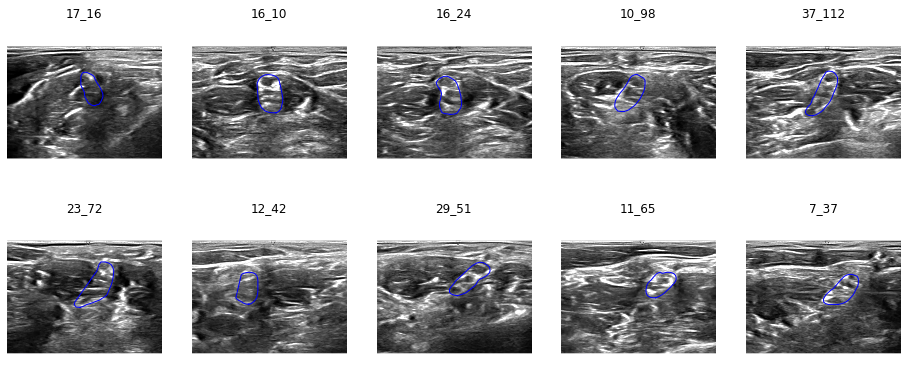

3.0


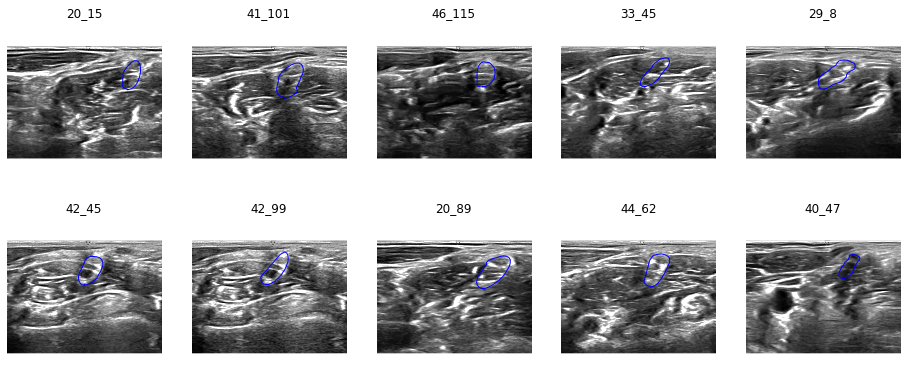

In [8]:
training.loc[training['hasmask'],'KMeansCluster'] = kmc

clusters = training.groupby(by='KMeansCluster')

for key, group in clusters:
    batch = uns.batch(group.sample(n=np.min((10,len(group)))))
    print(key)
    ax = batch.plot_grid()
    plt.show()

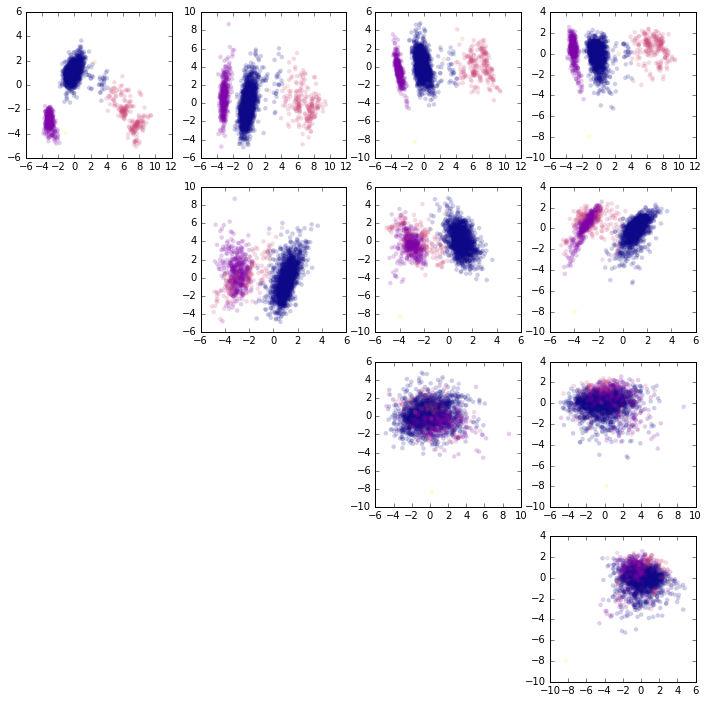

In [9]:
bandwidth = cluster.estimate_bandwidth(X, quantile=.3, n_samples=150)
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(P.transform(X))
labels = ms.labels_

plot_pca_comps(pft, 5, figsize=(12,12),
               alpha=0.2, 
               edgecolors='none', 
               color=ms.labels_, 
               cmap=colormap(len(set(labels)))
              )

# Examples from groups identified

0.0


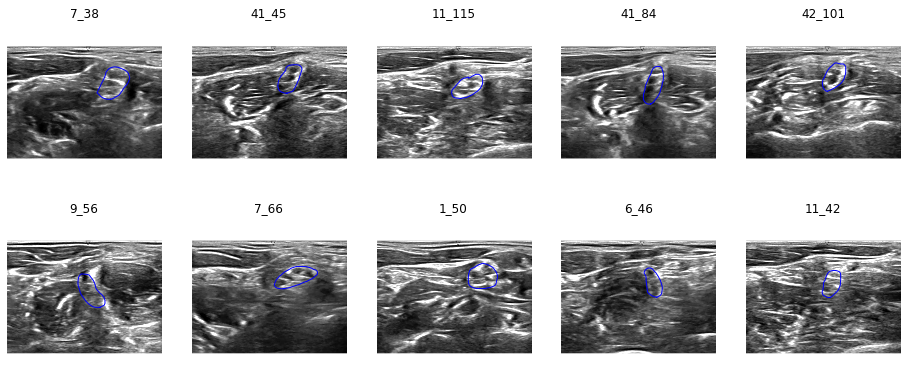

1.0


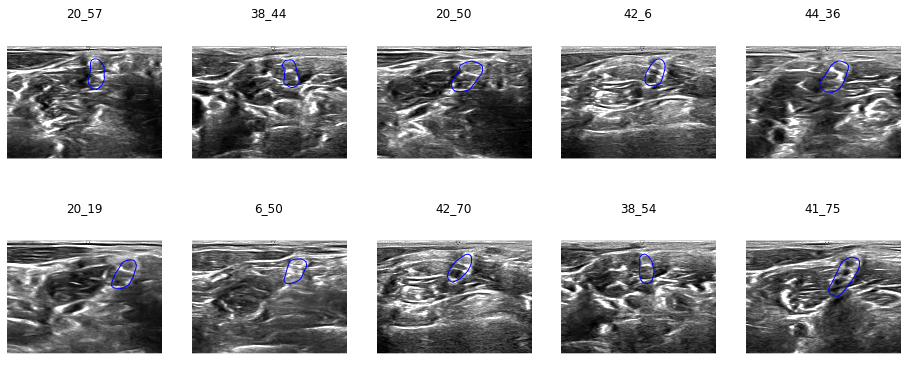

2.0


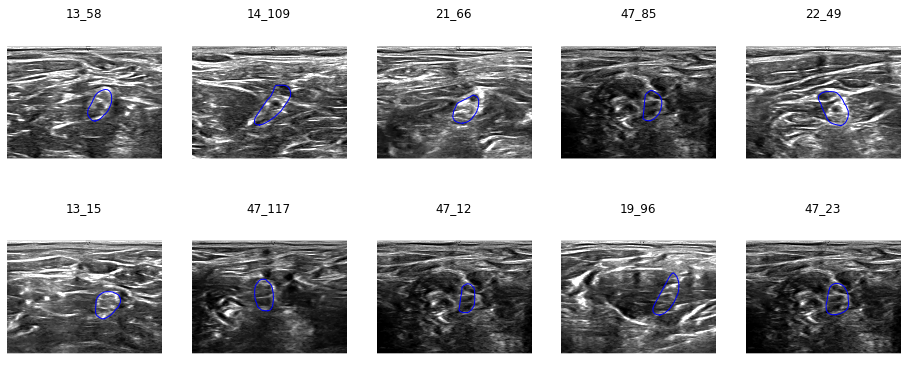

3.0


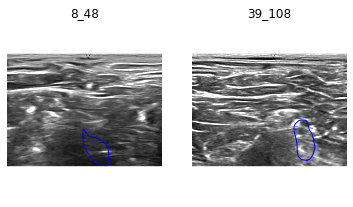

4.0


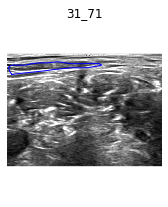

In [10]:
training.loc[training['hasmask'],'MeanShiftCluster'] = ms.labels_

clusters = training.groupby(by='MeanShiftCluster')

for key, group in clusters:
    batch = uns.batch(group.sample(n=np.min((10,len(group)))))
    print(key)
    ax = batch.plot_grid()
    plt.show()

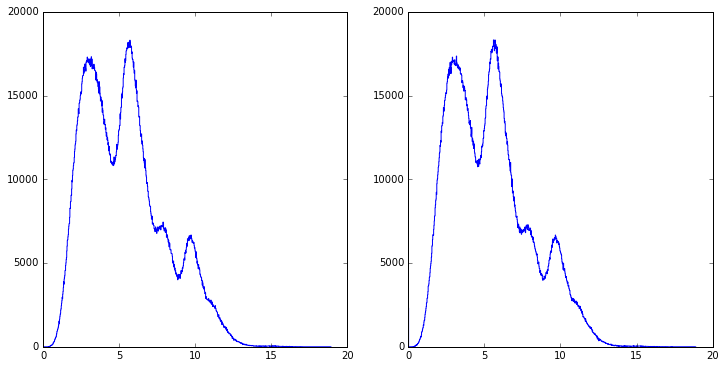

In [8]:
from sklearn import metrics
DX = metrics.pairwise_distances(X)
DPX = metrics.pairwise_distances(P.transform(X))
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].hist(DX.flatten(), bins=1000, histtype='step')
ax[1].hist(DPX.flatten(),bins=1000, histtype='step')
plt.show()

Found 5 clusters


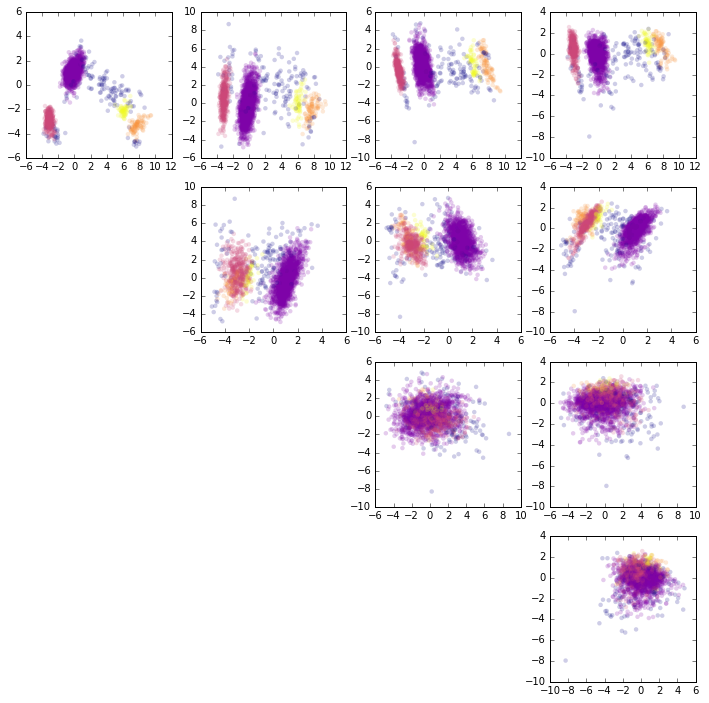

In [9]:
db = cluster.DBSCAN(eps=2, min_samples=15)
db.fit(P.transform(X))
labels = db.labels_
print('Found {:d} clusters'.format(len(set(labels))))
plot_pca_comps(P.fit_transform(X), 5, figsize=(12,12),
               alpha=0.2, 
               edgecolors='none', 
               color=labels,
               cmap=colormap(len(set(labels))))

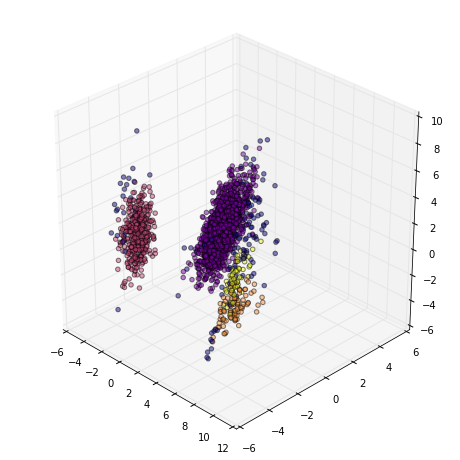

In [12]:
from ipywidgets import interact, interactive, fixed, IntSlider
import ipywidgets as widgets
from IPython import display


@interact(angle1=IntSlider(min=-180, max=180, step=15),
         angle2=IntSlider(min=-90, max=90, step=15))
def plot_pca3d(angle1, angle2):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(pft[:,0],pft[:,1],pft[:,2], c=labels, alpha=0.5, cmap=colormap(len(set(labels))), edgecolors='none')
    ax.view_init(angle2,angle1)
    return
    

In [131]:
pft.shape

(2323, 11)

In [ ]:
ac = cluster.AgglomerativeClustering(n_clusters=5)
ac.fit(pft)
labels = ac.labels_

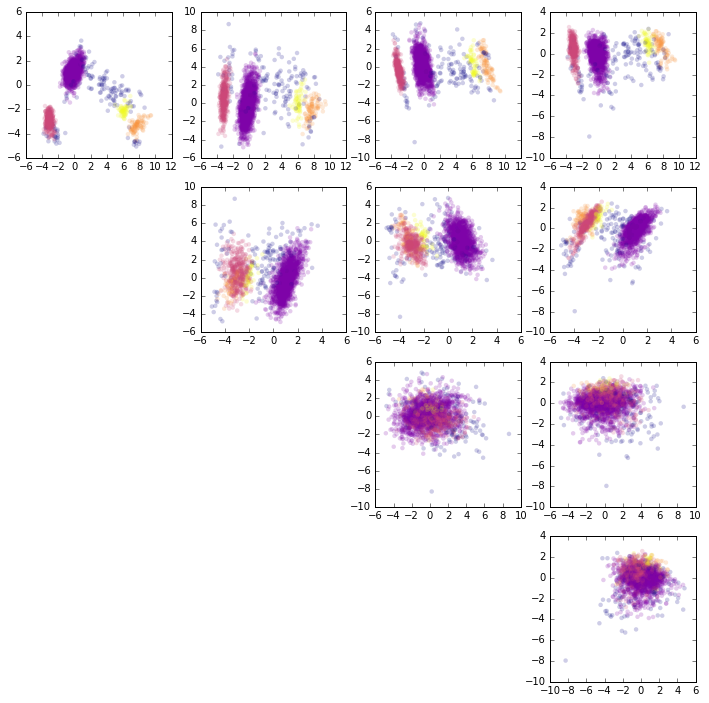

In [116]:
plot_pca_comps(pft, 5, figsize=(12,12),
               alpha=0.2, 
               edgecolors='none', 
               color=labels,
               cmap=colormap(len(set(labels))))

0.0


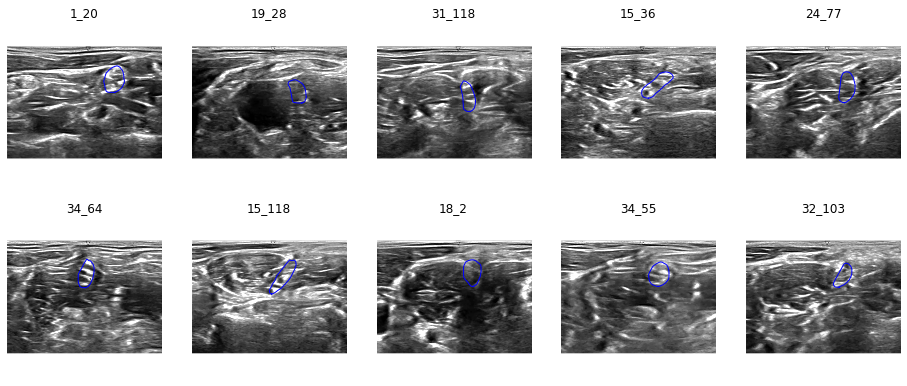

1.0


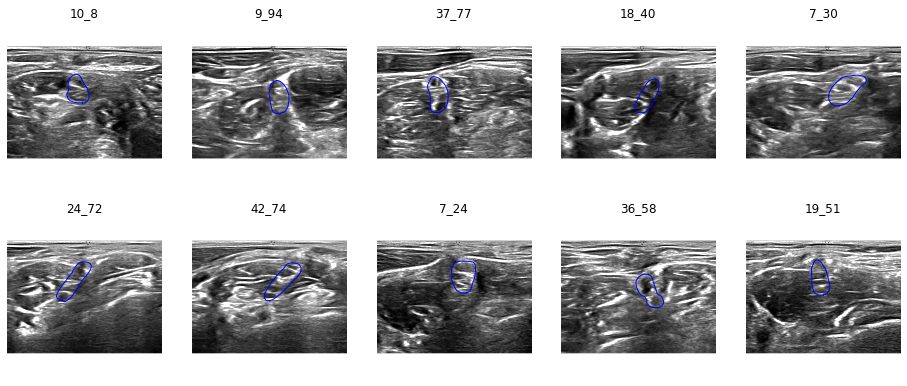

2.0


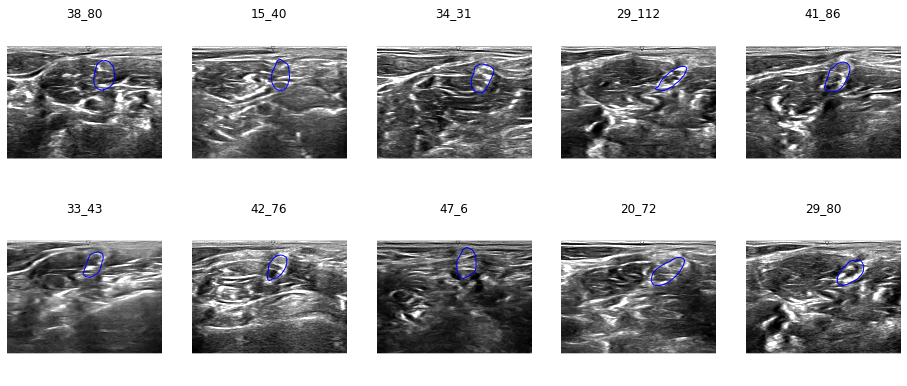

3.0


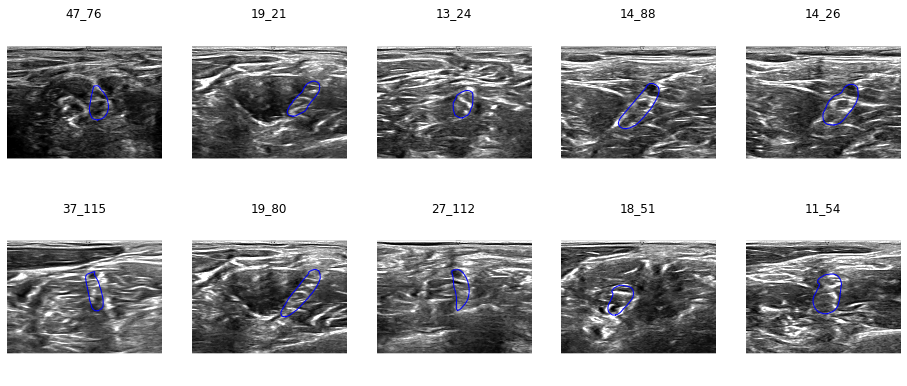

4.0


/Users/chrisv/anaconda/lib/python3.4/site-packages/skimage/external/tifffile/tifffile.py:1794: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


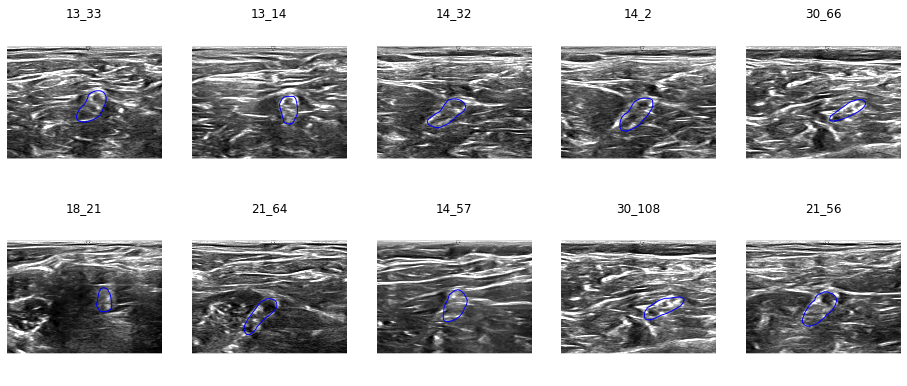

In [64]:
training.loc[training['hasmask'],'AggCluster'] = ac.labels_

clusters = training.groupby(by='AggCluster')

for key, group in clusters:
    batch = uns.batch(group.sample(n=np.min((10,len(group)))))
    print(key)
    ax = batch.plot_grid()
    plt.show()